In [49]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [50]:
class ClusterNode:
    id = 1
    def __init__(self, submodelNodes, interfaceVars):
        self.id = ClusterNode.id
        ClusterNode.id += 1
        self.submodelNodes = submodelNodes
        self.parent = None
        self.children = []
        self.interfaceVars = interfaceVars  # RELo
        self.message = []  # messages received
        self.isLeaf = False
        self.computedChildren = 0

    def __str__(self):
        return f'node {self.id}'
    
    def getLeaves(self, res):
        if self.isLeaf:
            res.add(self)
        else:
            for c in self.children:
                c.getLeaves(res)

In [ ]:
def ComputeLMEU(Submodel):
    return {0:1}

def ComputeTstMEU(Tst):
    leaves = set()
    Tst.getLeaves(leaves)
    leaves = list(leaves)
    MEU = 0

    while leaves:
        tst = leaves.pop(0)
        Vc = ComputeLMEU(tst) # IS A DICT

        if len(Vc) == 1:
            MEU += list(Vc.values())[0]
        else:
            p = tst.parent
            p.messages.append(Vc)
            p.computedChildren += 1
            if p.computedChildren == len(p.children):
                leaves.append(p)
    return MEU


In [52]:
id = gum.loadID('pigs_limid.bifxml')

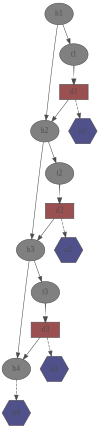

In [53]:
gnb.showInfluenceDiagram(id)

In [54]:
node1 = ClusterNode({id.variable('d1'), id.variable('u1'), id.variable('t1')}, {id.variable('h1'), id.variable('h2')})
node2 = ClusterNode({id.variable('d2'), id.variable('u2'), id.variable('t2')}, {id.variable('h2'), id.variable('h3')})
node3 = ClusterNode({id.variable('d3'), id.variable('u3'), id.variable('t3'), id.variable('h4'), id.variable('u4')}, {id.variable('h4')})

node1.children.append(node2)
node2.children.append(node3)
node3.parent = node2
node2.parent = node1
node3.isLeaf = True

In [55]:
ComputeTstMEU(node1)

1